# Figure S3. Goodness-of-fit measures in the IMAGEN dataset

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR, $IMAGEN_PROJECT_DIR & $INPUT_DIR

In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pickle

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)

from utils import transform
from modeling.check_fit import *

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({"font.size": 16, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = "#44546A"

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [8]:
try:
    data = pd.read_csv("imagen_fc-ses_sc-FU2_runs-2_data.csv", index_col=[0,1])
except FileNotFoundError as e:
    print("Run Figure 3 first")
    raise(e)

In [4]:
# split data into two sessions
data_split = {}
for ses, df in data.groupby("ses"):
    data_split[ses] = df

Goodness-of-fit	-3.414	0.001	-0.035	0.124
FC correlation	-3.071	0.003	-0.022	0.088
SC-FC coupling	-4.577	0.0	-0.02	0.052
FC difference	1.406	0.162	0.012	0.107
FCD KS distance	0.111	0.912	0.0	0.037


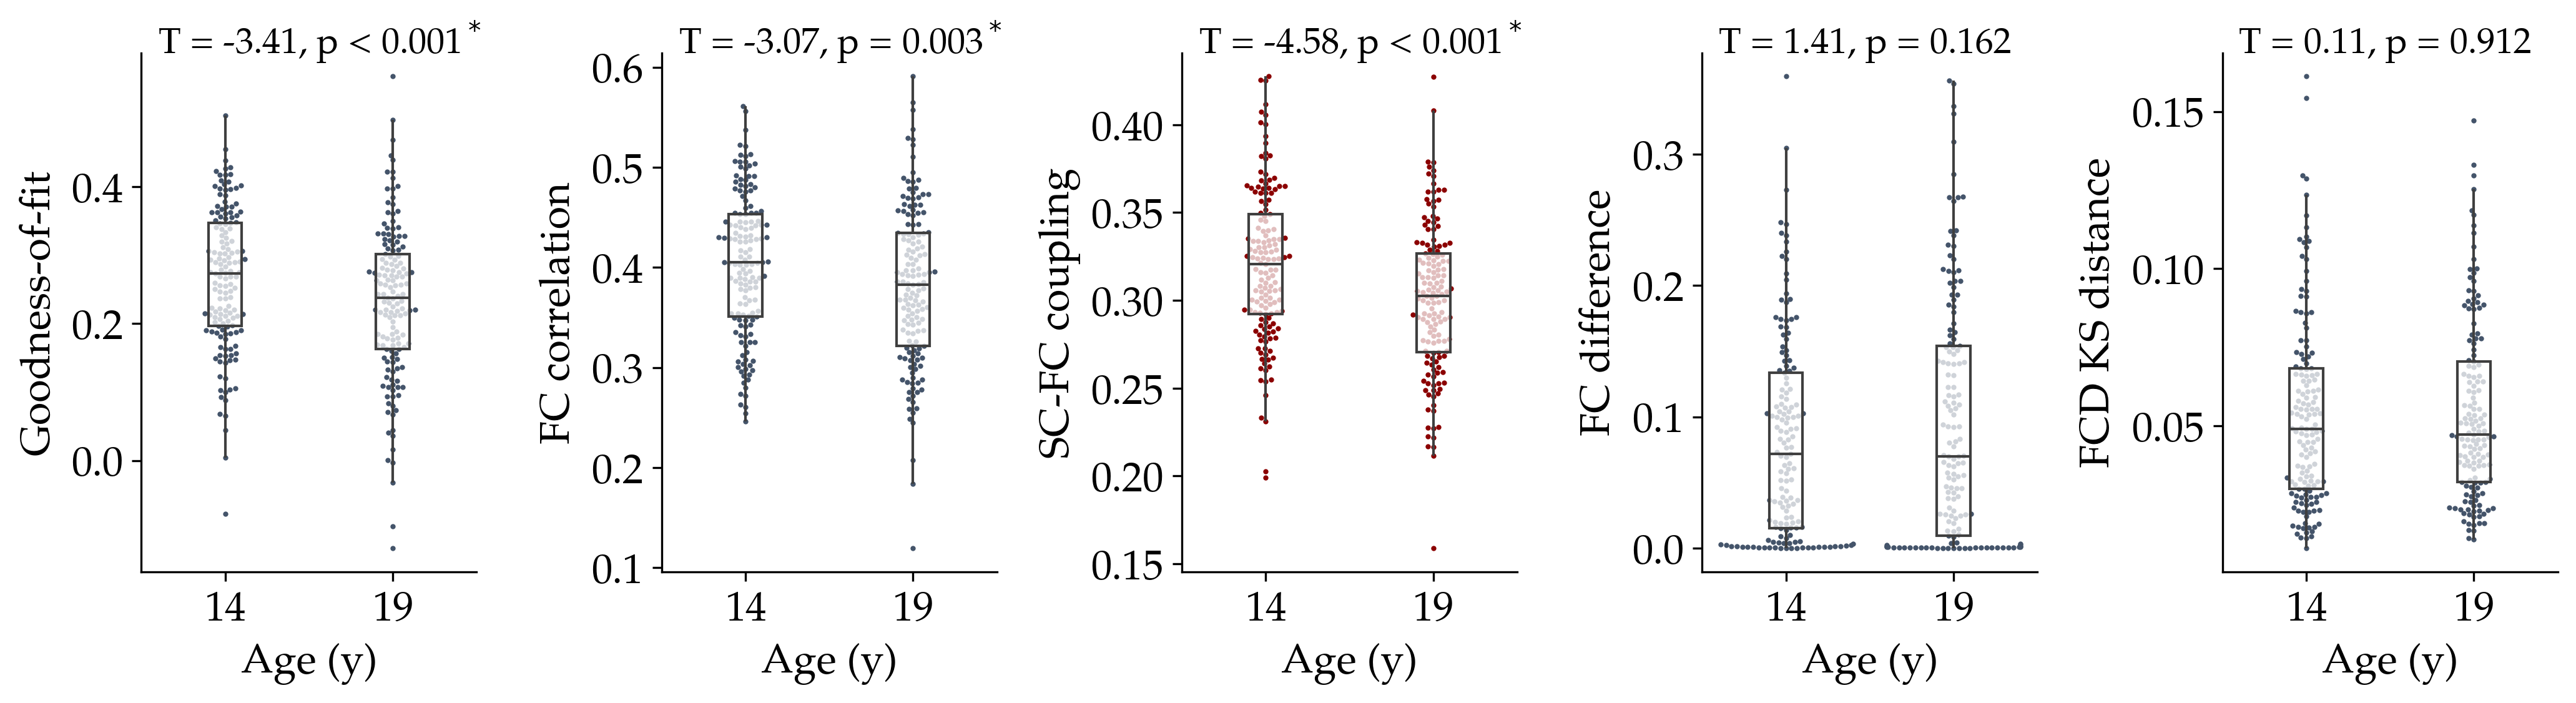

In [5]:
gof_labels = {
    "gof": "Goodness-of-fit",
    "fc_corr": "FC correlation",
    "sc_fc": "SC-FC coupling",
    "fc_diff": "FC difference",
    "fcd_ks": "FCD KS distance",
}

fig, axes = plt.subplots(1, len(gof_labels), figsize=(14, 4))
add_text = True
for i, (col, label) in enumerate(gof_labels.items()):
    ax = axes[i]
    if col != "sc_fc":
        color = thcolor
    else:
        color = "darkred"
    sns.swarmplot(data=data.reset_index(), x="ses", y=col, s=2, color=color, ax=ax)
    sns.boxplot(
        data=data.reset_index(),
        x="ses",
        y=col,
        showfliers=False,
        showcaps=False,
        width=0.2,
        boxprops={"facecolor": (1, 1, 1, 0.75)},
        ax=ax,
    )
    plt.setp(ax.collections, zorder=0, label="")  # puts swarm in the back
    ax.set_ylabel(label)
    ax.set_xticklabels(["14", "19"])
    ax.set_xlabel("Age (y)")
    sns.despine()
    # add statistics
    t, p = scipy.stats.ttest_rel(
        data_split["FU2"].loc[:, col], data_split["BL"].loc[:, col]
    )
    mean_diff = (
        data_split["FU2"].loc[:, col].values -
        data_split["BL"].loc[:, col].values
    ).mean()
    sd_diff = (
        data_split["FU2"].loc[:, col].values -
        data_split["BL"].loc[:, col].values
    ).std()
    if add_text:
        if p > 0.001:
            text = f"T = {t:.2f}, p = {p:.3f}"
        else:
            text = f"T = {t:.2f}, p < 0.001"
        if p < 0.05:
            text += r"$^*$"
        text_x = ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05
        text_y = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 1
        ax.text(text_x, text_y, text, color="black", size=14, multialignment="left")
    print(label, round(t, 3), round(p, 3), round(mean_diff,3), round(sd_diff,3), sep="\t")
fig.tight_layout(pad=1.0)

Descriptives:

In [6]:
data_split["BL"][list(gof_labels.keys())].describe().round(3)

,gof,fc_corr,sc_fc,fc_diff,fcd_ks
count,149.000,149.000,149.000,149.000,149.000
mean,0.266,0.403,0.320,0.083,0.054
std,0.102,0.071,0.043,0.077,0.030
min,-0.078,0.246,0.199,0.000,0.011
25%,0.197,0.351,0.292,0.015,0.030
50%,0.273,0.405,0.321,0.072,0.049
75%,0.348,0.453,0.349,0.133,0.068
max,0.504,0.561,0.427,0.359,0.161


In [7]:
data_split["FU2"][list(gof_labels.keys())].describe().round(3)

,gof,fc_corr,sc_fc,fc_diff,fcd_ks
count,149.000,149.000,149.000,149.000,149.000
mean,0.231,0.381,0.300,0.096,0.054
std,0.113,0.080,0.043,0.092,0.029
min,-0.128,0.120,0.159,0.000,0.014
25%,0.163,0.321,0.271,0.009,0.032
50%,0.238,0.382,0.303,0.070,0.047
75%,0.302,0.435,0.327,0.154,0.070
max,0.561,0.591,0.427,0.356,0.147
